## Week 3 Exercise
Student's t-distribution and hypothesis testing



In [3]:
# import libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### Part 1. plot t-distributions 

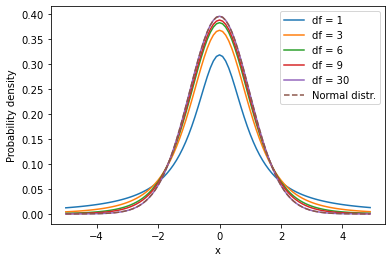

In [22]:
# plot the probability density function for student's t distributions with different degree of freedom
#
df=[1,3,6,9,30]
x=np.arange(-5,5,0.1)
for df_i in df: 
    t_pdf=stats.t.pdf(x,df_i)
    plt.plot(x,t_pdf,label=f'df = {df_i}')

# add normal distribution for comparison
n_pdf=stats.norm.pdf(x)
plt.plot(x,t_pdf,'--',label=f'Normal distr.')

plt.xlabel('x')
plt.ylabel('Probability density')
plt.legend()    
plt.show()

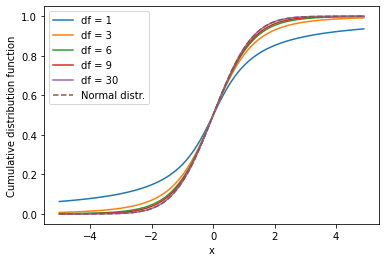

In [23]:
# plot the cumulative distribution function (CDF) for student's t distributions with different DoF
df=[1,3,6,9,30]
x=np.arange(-5,5,0.1)
for df_i in df: 
    t_cdf=stats.t.cdf(x,df_i)
    plt.plot(x,t_cdf,label=f'df = {df_i}')

# add normal distribution for comparison
n_cdf=stats.norm.cdf(x)
plt.plot(x,t_cdf,'--',label=f'Normal distr.')

plt.xlabel('x')
plt.ylabel('Cumulative distribution function')
plt.legend()    
plt.show()

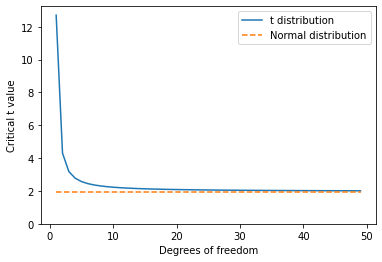

In [46]:
# find the critical t-values for student's t distributions with different DoF

# confidence level
CL=0.975

df=np.arange(1,50,1)
tcrit=np.zeros(np.size(df))
for i in np.arange(0,np.size(df),1):
    tcrit[i]=stats.t.ppf(CL,df[i])

plt.plot(df,tcrit,'-',label='t distribution')

# plot normal distribution as a reference
tcrit_norm=stats.norm.ppf(CL)
plt.plot(df,tcrit_norm*np.ones(np.size(df)),'--',label='Normal distribution')
plt.legend()
plt.ylabel('Critical t value')
plt.xlabel('Degrees of freedom')
plt.ylim(bottom=0)
plt.show()

### Part 2. Hypothesis test  (example 1)
Test whether or not the mean annual temperature of Atlanta for the last decade (2013-2022) is significantly warmer than the long term average


In [49]:
# read Atlanta temperature data
df=pd.read_excel('./ATL_MonMeanTemp_1879_2022.xlsx',skiprows=1)

# year
year=df.Year

# temperature of all months
All_Month=df.iloc[:,1:13]
All_Month

# calculate annual mean from all months data
Annual=All_Month.mean(axis=1)

In [59]:
mu=np.mean(Annual)
x=np.mean(Annual[-10:])

print(f'Long-term annual mean temperature is {mu:6.4} deg F')
print(f'Last 10-year mean temperature is {x:6.4} deg F')

Long-term annual mean temperature is  61.93 deg F
Last 10-year mean temperature is  64.45 deg F


#### Step 1. Set the confidence leve to 95% confidence level 

In [62]:
CL=0.95

#### Step 2. State the hypotheses

H0: The average annual temperature of Atlanta for the recent decade (2013-2022) is NOT significantly warmer than the long-term average annual temperature.

H1: The average annual temperature of Atlanta for the recent decade (2013-2022) is significantly warmer than the long-term average annual temperature.

#### Step 3. State the statistics to be used
We will use the Student's t-distribution with one-tailed test


#### Step 4. Determine the critical region

In [63]:
# N is the sample size
N=10
# calculate the critical t-value (one-tailed)
tcrit=stats.t.ppf(CL,N-1)
# display the critical region
print(f'The critical region is t < {tcrit:5.4}')

The critical region is t < 1.833


#### Step 5. Evaluate whether or not the data is outside of the critical region

In [64]:
# standard deviation from the last 10 years
sig=np.std(Annual[-10:],ddof=1)

# standard error of the 10 year mean temperature
SE=sig/np.sqrt(N-1)

# t-value of the data is (x-mu)/(SE)
t = (x-mu)/SE
print(f'The t-value of the data is {t: 5.4}')

The t-value of the data is  5.677


#### Conclusion
Because t > tcrit, we reject the null hypothesis (N0). The average annual temperature of Atlanta for the recent decade (2013-2022) is significantly warmer than the long-term average annual temperature.

### Part 3. Hypothesis test (example 2)
Test whether or not the mean annual temperature of Atlanta for one decade (1991-2000) is significantly different from another decadal average from 1981 to 1990.

In [65]:
# read Atlanta temperature data
df=pd.read_excel('./ATL_MonMeanTemp_1879_2022.xlsx',skiprows=1)
# year
year=df.Year
# temperature of all months
All_Month=df.iloc[:,1:13]
All_Month
# calculate annual mean from all months data
Annual=All_Month.mean(axis=1)

In [73]:
# select two periods

index1=(year>=1981)&(year<=1990)
index2=(year>=1991)&(year<=2000)

Annual1=Annual[index1]
Annual2=Annual[index2]

x1=np.mean(Annual1)
x2=np.mean(Annual2)

print(f'1980s mean is {x1:5.3} deg F')
print(f'1990s mean is {x2:5.3} deg F')

1980s mean is  62.4 deg F
1990s mean is  62.9 deg F


#### Step 1. Set the confidence level to 95% confidence level

In [74]:
CL=0.95

#### Step 2. State the hypotheses
H0: the average annual temperature of Atlanta for 1990s is NOT significantly different from that for 1980s.

H1: the average annual temperature of Atlanta for 1990s is NOT significantly different from that for 1980s.

#### Step 3. State the statistic used
We will use Student's t-distribution with two-tailed test.

#### Step 4. Determine the critical region


In [77]:
## N1 and N2 are the sample size
N1=10
N2=10
df=N1+N2-2

# calculate the critical t-value (one-tail)
alpha = 1-CL
tcrit=stats.t.ppf(1-alpha/2,df) # two tailed test

# display the critical region
print(f'The critical region is |t| < {tcrit:5.4}')


The critical region is |t| < 2.101


#### Step 5. Evaluate whether or not the data is outside of the critical region

In [82]:
# standard deviation from the each of the two decades
sig1=np.std(Annual1,ddof=1)
sig2=np.std(Annual2,ddof=1)

# calculate the combined standard deviation weighted by the sample size
sig = np.sqrt( (N1*sig1**2+N2*sig2**2)/(N1+N2-2) )

# standard error of the combined data
SE=sig*np.sqrt(1/N1+1/N2)

# t-value of the data is (x2-x1)/(SE)
t = (x2-x1)/SE

print(f'mean temperature difference is {x2-x1:5.4}')

print(f'std of the first period is {sig1:5.4}')
print(f'std of the second period is {sig2:5.4}')
print(f'combined std is {sig:5.4}')
print(f'combined SE is {SE:5.4}')
print(f'The t-value of the data is {t:5.4}')

mean temperature difference is 0.4542
std of the first period is 1.278
std of the second period is 0.9192
combined std is 1.173
combined SE is 0.5247
The t-value of the data is 0.8655


#### Conclusion: Because |t| < tcrit, we CANNOT reject the null hypothesis (N0). The 1980s and 1990s are not significantly different from one another at the 95% confidence level. 